# Linear Regression on adult.csv

#### Import Modules

In [ ]:
import pandas as pd
import sklearn.model_selection

#### Loading the dataset

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Splitting the Data into Training and Test Sets

In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print(f"df_train: {df_train.shape}")
print(f"df_test: {df_test.shape}")

df_train: (24420, 15)
df_test: (8141, 15)


#### Data Exploration

In [4]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

Matplotlib is building the font cache; this may take a moment.


<Axes: >

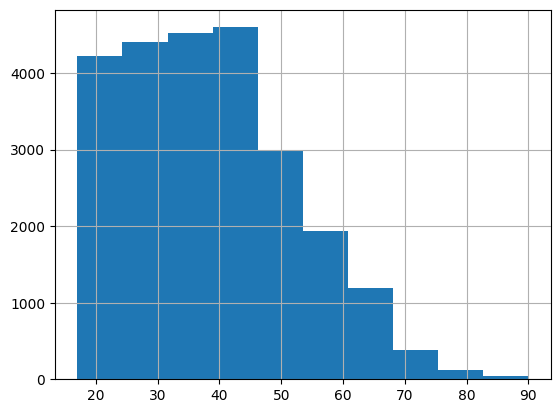

In [7]:
df_train["age"].hist()

<Axes: >

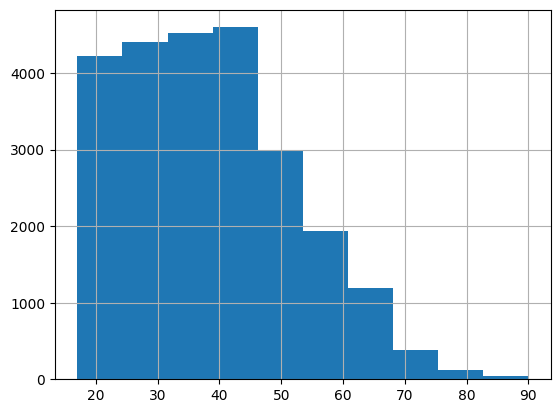

In [8]:
df_train["age"].hist()

<Axes: xlabel='workclass'>

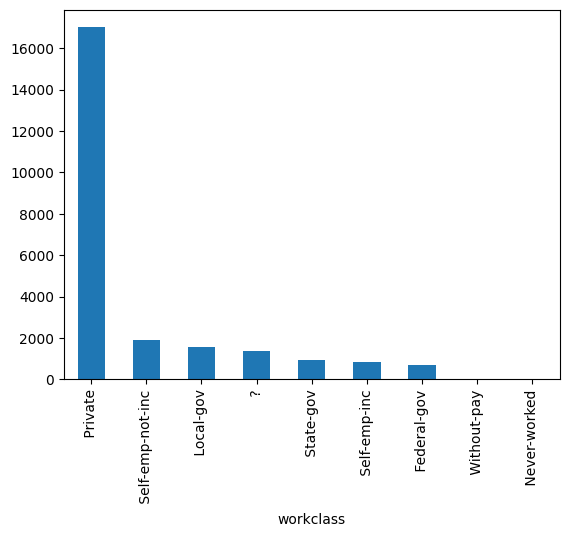

In [9]:
df_train["workclass"].value_counts().plot(kind='bar')

In [10]:
df_train["workclass"].unique()

array([' Private', ' Local-gov', ' Without-pay', ' State-gov',
       ' Self-emp-not-inc', ' Federal-gov', ' Self-emp-inc', ' ?',
       ' Never-worked'], dtype=object)

<Axes: xlabel='target'>

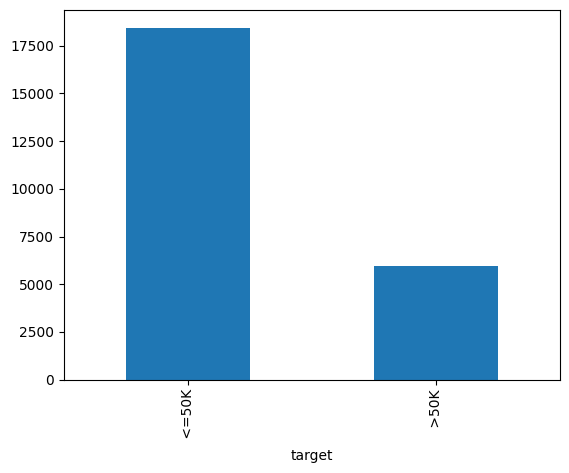

In [11]:
df_train["target"].value_counts().plot(kind='bar')

### Data Preprocessing

#### Removing missing values

In [14]:
df_train = df_train.replace("?", pd.NaT)
df_train = df_train.dropna()
print(f"df_train_cleaned: {df_train.shape}")

df_test = df_test.replace("?", pd.NaT)
df_test = df_test.dropna()
print(f"df_test_cleaned: {df_test.shape}")

df_train_cleaned: (24420, 15)
df_test_cleaned: (8141, 15)


#### Splitting Features and the Target Label

In [13]:
x_train = df_train.drop(["target"], axis=1)
y_train = df_train["target"]
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

x_test = df_test.drop(["target"], axis=1)
y_test = df_test["target"]
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (24420, 14)
y_train: (24420,)
x_test: (8141, 14)
y_test: (8141,)


### Feature Engineering 

#### One-Hot Encoding and Standadization

#### Dimensionality Reduction